# 实验二：回归模型

- 回归是监督学习的一个重要问题，回归用于预测**输入变量**和**输出变量**之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。
- 回归模型是一种表示从输入变量到输出变量之间映射的函数
- 对连续值的预测
- 可以用合适的曲线揭示样本点随着自变量的变化关系

## 实验要求
### 截止日期：10月22日
### 基本要求
将数据集winequality-white.csv按照4:1划分为训练集和测试集。
1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。
1. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：
- 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
- 需要对数据集进行一定的预处理

### 中级要求
探究回归模型在机器学习和统计学上的差异。
- 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

## 线性回归

线性回归模型(Linear Regression)，因为结构简单，可解释性好，实现简单，在工程领域得到广泛应用。

首先对线性函数进行简单的回顾：

![a.png](https://s2.loli.net/2022/10/04/rdm5WLI84BNznUR.png)

### 预测模型

首先，我们明确几个常用的数学符号：
- 特征 (features): $x_i$, 比如房屋的面积，卧室的数量都可以是房屋的特征
- 特征向量 (输入): $x$, 若干个特征组成的向量，代表一套房屋的所有信息。例如，$x^{(i)}_j$ 表示第 $i$ 套房的第 $j$ 个特征
- 输出向量 $y$, $y^{(i)}$ 表示第 $i$ 个输入对应的输出
- 假设 (hypothesis): 也称预测函数，比如一个线性的预测函数是：
$$h_\theta (x)=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n=\theta^T x$$
上述的表达式就是**回归方程 (regression equation)**, $\theta$ 就是回归系数，关系到我们预测的准确程度

## 一元线性回归 vs. 多元线性回归

假设一共有N个特征向量，对于多元线性回归有m个特征：
- 数据集：
   - 一元：$\{(x^{(i)}, y^{(i)})\}$  
   - 多元：$\{(\pmb{x}^{(i)}, y^{(i)})\},\\ \pmb{x}^{(i)}=[x^{(i)}_1, x^{(i)}_2,..., x^{(i)}_m], i=1,2,...,N$


- 假设：
  - 一元：$f(x^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}$ 
  - 多元：$f(\pmb{x}^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}_1+\theta_2x^{(i)}_2 + ... +\theta_mx^{(i)}_m $
  
- 参数：
  - 一元：$\pmb{\theta}=[\theta_0, \theta_1]$
  - 多元：$\pmb{\theta}=[\theta_0, \theta_1,\theta_2, ...,\theta_m]$

- 损失函数：
  - MSE：$$Loss=\frac{1}{N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
  有的资料上损失函数多了个$\frac{1}{2}$：
  $$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
  目的是求导后将二次项的系数变为1，加和不加对结果理论上没有影响。
- 目标：损失函数最小

- 解析解：
  - 一元：分别对MSE中的$\theta_0, \theta_1$求偏导
  
  - 多元：对MSE中的$\pmb{\theta}$求偏导
  $\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$

### 优化方法
 - 直接求解析解：$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$
   - 优点：不需要试错，可以直接取得最小值，比较快捷。

   - 缺点：当特征过于复杂时，无法求逆。

   - 适用于：小数据场景。（梯度下降相对用的更多一些）
 - 梯度下降法
 - 岭回归

### 梯度下降法

![image.png](https://s2.loli.net/2022/10/04/XOjpPcdCksRwQn8.png)

### 学习率

![image.png](https://s2.loli.net/2022/10/04/OfuUjWLSJF3qyso.png)

### 批量梯度下降
批量梯度下降法为最小化所有训练样本的损失函数，使得最终求解的是全局的最优解。


![image.png](https://s2.loli.net/2022/10/04/TB4DmndiJ9OVPYk.png)

虽然批量梯度下降能够收敛到最小值，但每调节一个$\theta_j$都必须遍历一遍样本集，如果样本的体积m很大，那么这种算法开销巨大，但由于其向量表示，可以利用并行计算优化性能。

### 随机梯度下降

![image.png](https://s2.loli.net/2022/10/04/u6YUkgCxZ7s48ft.png)

### 岭回归

公式$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$不可逆原因:

- 矩阵可逆的充要条件：满秩；
- 存在噪声维，使得特征间存在线性关系，导致矩阵的秩小于特征维度；
- 特征数比样本还多的时候，方程的个数比未知数的个数还要少，所以会导致矩阵的秩小于样本数,无穷多解满足该情况，进而矩阵不可逆。

为了解决这个问题，岭回归在最小二乘估计的基础上增加了一项，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$

为了解决这个问题，岭回归在最小二乘估计的基础上增加了一项，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$

而岭回归模型的目标函数在线性模型的基础上加了L2范数的惩罚项：
$$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2+\lambda \sum_{j=0}^N\theta_j^2$$
当岭参数$\lambda$时，得到最小二乘解，当岭参数$\lambda$趋向更大时，岭回归系数 $\pmb{\theta}$ 估计趋向于0。
从岭回归的原理可以知道，岭回归就是改良后的最小二乘估计法，通过放弃最小二乘法的无偏性，通过损失部分特征信息，降低模型精度来得到更符合实际情况的回归系数。

### winequality-white数据集

In [20]:
import pandas as pd
import numpy as np
data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


最后一列是质量的评级，前面其他的都是酒的特征

### 对数据集进行预处理

对数据集的预处理是一个十分重要的步骤，能够使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确，并加快学习算法的收敛速度。

常用的预处理方法有：标准化、归一化和中心化。同学们根据需要从中选择一种或几种方法进行预处理（采用其他方法亦可）。

![image.png](https://s2.loli.net/2022/10/04/WqxB76cXLGtePSK.png)

In [21]:
# 中心化代码
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 提取特征和标签
X = data.iloc[:, 0:-1]  # N D
X = Normalization_fun(X)
Y = data.iloc[:, -1]

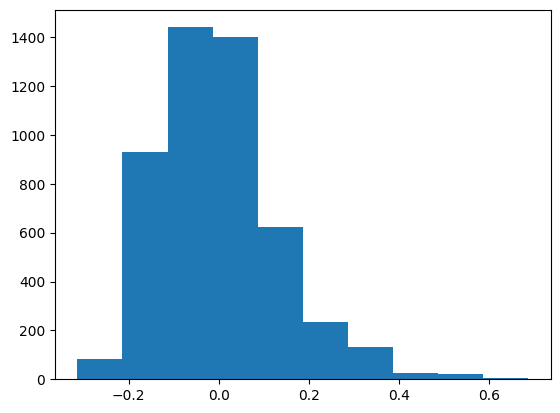

In [22]:
# 可视化中心化后的sulphates特征
import matplotlib.pyplot as plt
plt.hist(X["sulphates"])
plt.show()

In [23]:
# 这里注意一个小trick：回归系数会比特征x多一维，为了向量相乘方便，可以在训练集X左侧添加全为1的一列
data0 = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)
data0

,x0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,0.013963,-0.008080,0.015547,0.219457,-0.002292,0.033770,0.073409,0.134425,-0.171151,-0.046334,-0.276495
1,1.0,-0.053345,0.021332,0.003499,-0.073488,0.009578,-0.074244,-0.014758,-0.000528,0.101576,0.000178,-0.163591
2,1.0,0.119732,0.001724,0.039644,0.007800,0.012545,-0.018495,-0.095964,0.020679,0.065212,-0.057961,-0.066817
3,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
4,1.0,0.033193,-0.047295,-0.008549,0.032340,0.036284,0.040738,0.110532,0.030319,0.001576,-0.104473,-0.099075
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.0,-0.062960,-0.066903,-0.026621,-0.073488,-0.020096,-0.039401,-0.107565,-0.055666,0.074303,0.011806,0.110602
4894,1.0,-0.024499,0.040940,0.015547,0.024672,0.003643,0.075582,0.068769,0.016823,-0.034788,-0.034706,-0.147462
4895,1.0,-0.034114,-0.037491,-0.086862,-0.079623,-0.014161,-0.018495,-0.063482,-0.028675,-0.180242,-0.034706,-0.179720
4896,1.0,-0.130268,0.011528,-0.020597,-0.081157,-0.070541,-0.053338,-0.065802,-0.102899,0.137939,-0.127729,0.368667


In [24]:
# 初始化回归系数
W_init = np.random.randn(data0.shape[1], 1)
W_init

array([[ 2.63952002],
       [ 0.49160218],
       [-1.45364631],
       [-1.7007375 ],
       [ 1.42422888],
       [ 2.28660903],
       [-1.67298009],
       [-2.65604591],
       [ 0.62207561],
       [ 0.12832266],
       [-0.58022322],
       [-0.7029781 ]])

### 需要导入的包

In [42]:
import numpy as np
import operator
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
import copy
import pandas as pd

### 导入数据集 semesion

In [26]:

data = pd.read_csv("winequality-white.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


##   一、基本要求

将数据集winequality-white.csv按照4:1划分为训练集和测试集。

1.构造线性回归模型，并采用批量梯度下降和随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。

2.对于批量梯度下降和随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。需要对数据集进行一定的预处理

##  1.数据预处理

In [27]:
# 中心化
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x


# 归一化
def feature_scaling(x):
    x=np.array(x)
    for i in range(len(x[0])):
        max = -float('inf')
        min = float('inf') 
        for m in range(len(x)):
            if x[m][i] > max:
                max = x[m][i]
            if x[m][i] < min:
                min = x[m][i]
        for m in range(len(x)):
            if max - min != 0:
                x[m][i] = (x[m][i] - min) / (max - min)
    return x

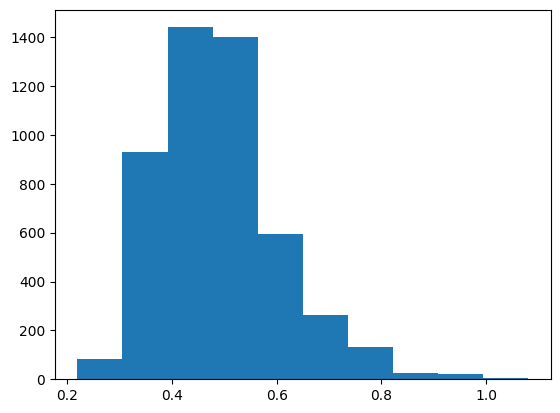

In [28]:
# 数据预处理
X = data.iloc[:, 0:-1]
data.iloc[:, 0:-1] = Normalization_fun(X)
# 可视化中心化后的sulphates特征
import matplotlib.pyplot as plt
plt.hist(X["sulphates"])
plt.show()

## 2. 划分训练集和测试集
### 使用分层采样对数据进行4：1划分处理

分层抽样4:1结果展示：


C:\Users\ZZB\AppData\Local\Temp\ipykernel_46464\223401744.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_data = data.groupby('quality').apply(lambda group : group.sample(frac=train_rate))
C:\Users\ZZB\AppData\Local\Temp\ipykernel_46464\223401744.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  y_num_train = train_data.groupby('quality').apply(lambda group : group)['quality'].value_counts()[x_

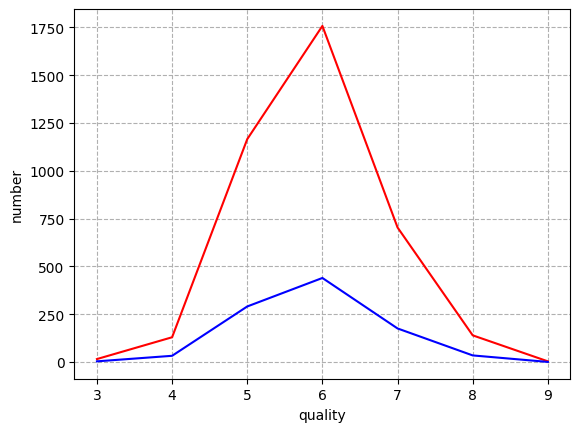

In [29]:
train_rate = 0.8 # 划分比例
# data.describe()
# 分层抽样得到训练集数据
train_data = data.groupby('quality').apply(lambda group : group.sample(frac=train_rate)) 
train_data.index = train_data.index.droplevel()
# 测试集数据
test_data = data[~data.index.isin(train_data.index)] 
# 重置索引
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

# 对分层抽样(4:1)的结果进行展示
print("分层抽样4:1结果展示：")
x_index = range(3,10)
y_num_train = train_data.groupby('quality').apply(lambda group : group)['quality'].value_counts()[x_index]
y_num_test = test_data.groupby('quality').apply(lambda group : group)['quality'].value_counts()[x_index]
plt.figure()
plt.plot(x_index,y_num_train, 'r')
plt.plot(x_index,y_num_test, 'b')
plt.grid(linestyle="--")
plt.xlabel("quality")
plt.ylabel("number")
# 显示图
plt.show()

In [30]:
# 提取数据特征和标签
train_X = train_data.iloc[:, 0:-1]
test_X = test_data.iloc[:, 0:-1]
train_Y = train_data.iloc[:, -1]
test_Y = test_data.iloc[:, -1]

# 在训练集和测试集左侧添加全为1的列
train_X = pd.concat([pd.DataFrame(np.ones(train_X.shape[0]), columns=['x0']), train_X], axis=1)
test_X = pd.concat([pd.DataFrame(np.ones(test_X.shape[0]), columns=['x0']), test_X], axis=1)
# 将数据转换为numpy.ndarray格式
train_X = np.array(train_X)
train_Y = np.array(train_Y)
train_Y = train_Y.reshape(-1, 1)
test_X = np.array(test_X)
test_Y = np.array(test_Y)
test_Y = test_Y.reshape(-1, 1)
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((3918, 12), (3918, 1), (980, 12), (980, 1))

## 3. 批量梯度下降和随机梯度下降

In [31]:
# 初始化回归系数
W_init = np.random.randn(train_X.shape[1], 1)
W_init

array([[ 1.70675238],
       [ 0.26137205],
       [ 1.42758144],
       [-2.0331195 ],
       [-0.23886723],
       [ 1.70319374],
       [ 1.12516286],
       [-0.038132  ],
       [ 0.26887487],
       [-0.07562938],
       [-0.0526431 ],
       [ 1.92565667]])

In [32]:
# 定义MSE
def MSE(X, Y, W):
    return np.sum(np.power((np.dot(X, W) - Y), 2)) / Y.size

###  (1) 批量梯度下降

In [33]:
# 批量梯度下降
def BGD(train_X, train_Y, test_X, test_Y, theta, alpha, epochs):
    theta = copy.deepcopy(theta)
    BGD_MSE_train = []
    BGD_MSE_test = []
    BGD_MSE_train.append(MSE(train_X, train_Y, theta))
    BGD_MSE_test.append(MSE(test_X, test_Y, theta))
    for i in range(epochs):
        for j in range(theta.size):
            Xj = train_X[:, j].reshape(-1, 1)
            theta[j] = theta[j] + alpha * np.sum((train_Y - np.dot(train_X, theta)) * Xj) / train_Y.size
        BGD_MSE_train.append(MSE(train_X, train_Y, theta))
        BGD_MSE_test.append(MSE(test_X, test_Y, theta))
    return theta, BGD_MSE_train, BGD_MSE_test

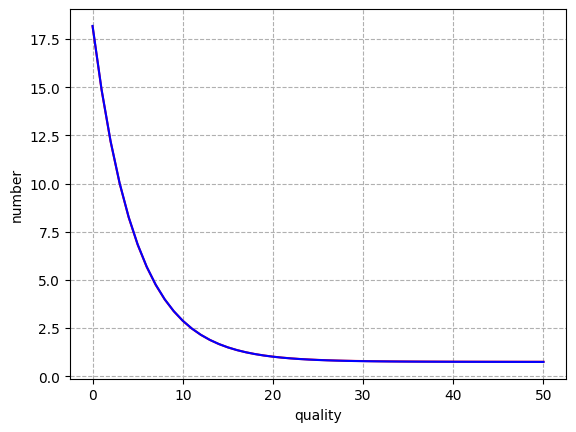

array([[ 5.85565403],
       [ 0.25652704],
       [ 1.2567043 ],
       [-1.97211116],
       [-0.21248578],
       [ 1.65270326],
       [ 1.14395676],
       [-0.04966681],
       [ 0.26889422],
       [-0.05196541],
       [-0.0139551 ],
       [ 1.96340996]])

In [34]:
alpha = 0.1
epochs = 50
BGD_theta, BSD_MSE_train, BSD_MSE_test = BGD(train_X, train_Y, test_X, test_Y, W_init, alpha, epochs)
plt.figure()
plt.plot(range(epochs+1),BSD_MSE_train, 'r')
plt.plot(range(epochs+1),BSD_MSE_test, 'b')
plt.grid(linestyle="--")
plt.xlabel("quality")
plt.ylabel("number")
# 显示图
plt.show()
BGD_theta

### (2) 随机梯度下降



In [35]:
# 随机梯度下降
def SGD(train_X, train_Y, test_X, test_Y, theta, alpha, epochs):
    train_X = copy.deepcopy(train_X)
    theta = copy.deepcopy(theta)
    SGD_MSE_train= []
    SGD_MSE_test = []
    SGD_MSE_train.append(MSE(train_X, train_Y, theta))
    SGD_MSE_test.append(MSE(test_X, test_Y, theta))
    for i in range(epochs):
        np.random.shuffle(train_X)
        for k in range(train_Y.size):
            Y_i = train_Y[epochs, :].reshape(-1, 1)
            X_i = train_X[epochs, :].reshape(1, -1)
            for j in range(theta.size):
                Xj = train_X[i, j].reshape(-1, 1)
                theta[j] = theta[j] + alpha * np.sum((Y_i - np.dot(X_i, theta)) * Xj)
        SGD_MSE_train.append(MSE(train_X,train_Y, theta))
        SGD_MSE_test.append(MSE(test_X, test_Y, theta))
    return theta, SGD_MSE_train, SGD_MSE_test

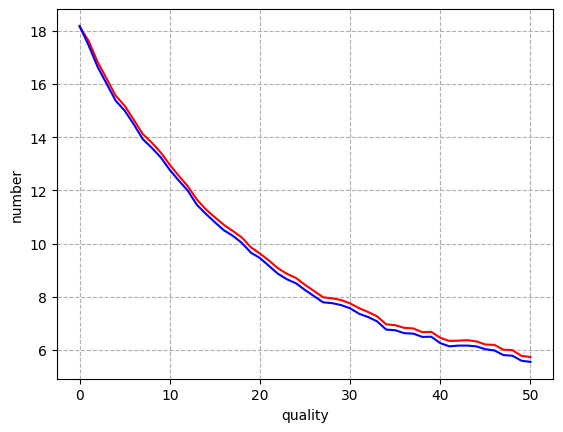

array([[ 3.68930643],
       [ 0.20252591],
       [ 1.44123464],
       [-2.04586892],
       [-0.25444647],
       [ 1.68056598],
       [ 1.15462926],
       [-0.03675998],
       [ 0.24921743],
       [ 0.0212715 ],
       [-0.02849554],
       [ 1.96848187]])

In [36]:
alpha = 0.00001
epochs = 50
SGD_theta, SGD_MSE_train, SGD_MSE_test = SGD(train_X, train_Y, test_X, test_Y, W_init, alpha, epochs)
plt.figure()
plt.plot(range(epochs+1),SGD_MSE_train, 'r')
plt.plot(range(epochs+1),SGD_MSE_test, 'b')
plt.grid(linestyle="--")
plt.xlabel("quality")
plt.ylabel("number")
# 显示图
plt.show()
SGD_theta

## 4. 探究BGD和SGD不同学习率MSE曲线
综合上面两幅图像收敛效果,我们固定学习轮数为30轮。对于批量梯度下降和随机梯度下降，我们均设置学习率为1, 0.01, 0.001, 0.0001,000001进行测试

c:\Users\ZZB\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38543 (\N{CJK UNIFIED IDEOGRAPH-968F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ZZB\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26426 (\N{CJK UNIFIED IDEOGRAPH-673A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ZZB\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26799 (\N{CJK UNIFIED IDEOGRAPH-68AF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ZZB\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ZZB\AppData\Local\Programs\Python\Python311

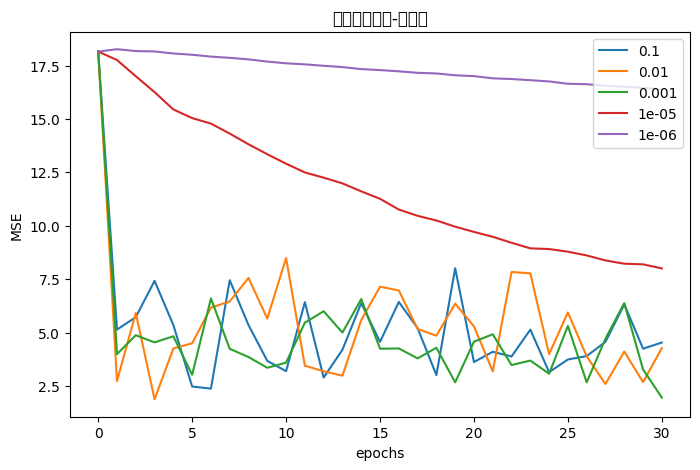

c:\Users\ZZB\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ZZB\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35797 (\N{CJK UNIFIED IDEOGRAPH-8BD5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


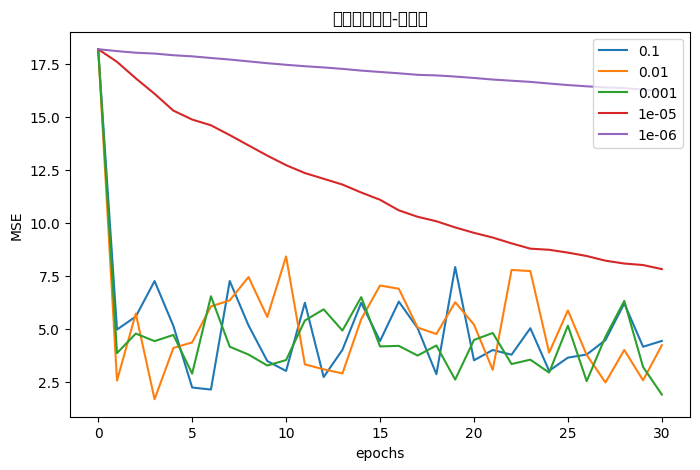

In [37]:
# 训练轮数
epochs =30
# 学习率
alphas = [0.1, 0.01, 0.001,0.00001,0.000001]
BGD_train = []
BGD_test = []
SGD_train = []
SGD_test = []
for alpha in alphas:
    SGD_theta, SGD_MSE_train, SGD_MSE_test= SGD(train_X, train_Y, test_X, test_Y, W_init, alpha, epochs)
    SGD_train.append(SGD_MSE_train)
    SGD_test.append(SGD_MSE_test)

# 随机梯度下降-训练集
plt.figure(figsize=(8, 5), dpi=100)
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("随机梯度下降-训练集")
for i in range(len(alphas)):
    plt.plot(range(epochs + 1), SGD_train[i])
plt.legend(alphas,loc='upper right')

# 随机梯度下降-测试集
plt.figure(figsize=(8, 5), dpi=100)
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("随机梯度下降-测试集")
for i in range(len(alphas)):
    plt.plot(range(epochs + 1), SGD_test[i])
plt.legend(alphas,loc='upper right')
plt.show()

###   分析如下：

由图可知, 对于批量梯度下降回归, 当学习率较大时模型收敛过慢, 当学习率过小时, 曲线收敛效果也不好, 当学习率处于0.1~1之间时，MSE曲线收敛效果较好. 对于随机梯度下降回归, 当学习率很小(例如1e-06)时, 模型的收敛结果不好，当学习率适中(例如0.001)时, 收敛迅速但收敛后出现波动. 对比以上结果, 可知相比随机梯度下降, 批量梯度下降效果更好.

训练轮次大小也应具体情况具体分析，随机梯度下降比批量梯度下降收敛更快, 因此对于随机梯度下降可以减少eoochs

## 二. 中级要求
### 回归模型在机器学习和统计学上的差异

### 1.评估标准
-   统计学：回归模型的评估在统计学中通常通过检验统计量来完成，例如确定模型的显著性、残差的正态性、独立性等。此外，统计学家常通过调整后的R²、AIC、BIC等指标来衡量模型的解释力和复杂度。重要的是，统计模型的好坏通常根据其在样本内的解释能力来判断。

-   机器学习：机器学习则更关注模型在样本外的表现，通过测试集上的预测精度来衡量模型。常用的评估指标包括均方误差（MSE）、均方根误差（RMSE）、R²等，同时通过交叉验证来避免过拟合。模型的目标是提升在未知数据上的预测效果，因此泛化误差（训练误差与测试误差之差）是机器学习中的重要评估标准。

### 2. 模型复杂度
-   统计学：在统计学中，回归模型通常较为简单且易于解释，比如线性回归、广义线性模型等。这些模型的可解释性使得研究者能够对每个变量的影响进行详细的分析，并进行相关的推断。

-   机器学习：机器学习中的回归模型可以非常复杂，如支持向量回归、随机森林回归、神经网络等。这些模型尽管能够处理高维、非线性的数据，但往往较难解释，尤其是深度学习模型，虽然能极大提高预测性能，但模型的“黑箱”特性使得对其可解释性的要求变得次要。

### 3. 数据处理方式
-   统计学：通常假设数据是“干净的”，即经过良好的预处理，少有噪声和异常值。数据量较小是统计学常见的情形，特别是在社会科学和医学研究中，因而更注重模型的精确性和解释力。

-   机器学习：机器学习通常处理大量的高维数据，且数据可能包含噪声和异常值。在这种情况下，模型的鲁棒性（抗噪性）和大规模数据处理能力显得尤为重要。机器学习方法更为灵活，并能在更少的假设下有效工作。

这两种方法的目标不同，尽管使用的方法类似。机器学习算法的评估使用测试集来验证其准确性。统计模型可以使用置信区间，显着性检验和其他检验对回归参数进行分析，以评估模型的合法性

## 三、高级要求

### 编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

In [47]:
def RidgeRegression(train_X, train_Y, L2_lambda):  # 设置岭系数为0.2
    xMat = np.mat(train_X)
    yMat = np.mat(train_Y)
    xTx = xMat.T * xMat
    rxTx = xTx + np.eye(xMat.shape[1]) * L2_lambda
    # 计算矩阵的值,如果值为0，说明该矩阵没有逆矩阵
    if np.linalg.det(rxTx) == 0.0:
        return
    theta = rxTx.I * xMat.T * yMat
    return theta

In [48]:
theta = RidgeRegression(train_X, train_Y,0.2)
train_MSE = MSE(train_X, train_Y, theta)
test_MSE = MSE(test_X, test_Y, theta) 
print("平均训练误差为:")
print(train_MSE)
print(f"平均测试误差为:")
print(test_MSE)

平均训练误差为:
0.5733928529189366
平均测试误差为:
0.5293502839608716
